# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [1]:
import numpy as np
def harmonic_speed(list_of_speeds):
    denominator = 0
    for i in list_of_speeds:
        denominator += (1/i)
    average_speed = len(list_of_speeds)/denominator
    return average_speed

harmonic_speed([60, 80])

68.57142857142857

### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową:

- Generujemy listę wielkości 700 tys.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy je jako chore.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich diagnoze na nieprawidlowa (bo skutecznosc testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).



In [2]:
import random as rd
import timeit

start = timeit.default_timer()
people = []
for i in range(700000):
    people.append('healthy')
chosen_ones = rd.sample(range(700000), 700)
for i in chosen_ones:
    people[i] = 'sick'

for i in range(7):
    while True:
        a = rd.randint(0,700000)
        if 'sick' == people[a]:
            people[a] = ['sick', 'healthy']
            break
for i in range(6993):
    while True:
        a = rd.randint(0,700000)
        if 'healthy' == people[a]:
            people[a] = ['healthy', 'sick']
            break

for i in range(len(people)):
    if type(people[i]) == str:
        people[i] = [people[i], people[i]]

tp = 0
all_positive = 0

for i in range(len(people)):
    if people[i][0] == 'sick':
        if people[i][1] == 'sick':
            tp += 1
            all_positive += 1
    if people[i][0] == 'healthy':
        if people[i][1] == 'sick':
            all_positive += 1

stop = timeit.default_timer()

print('Time: ', stop - start)
print(tp / all_positive)

Time:  0.8514205000000001
0.09016393442622951


#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [7]:
def bayes(sick_percentage, test_sensitivity):
    return (test_sensitivity * sick_percentage / (test_sensitivity * sick_percentage + (1 - test_sensitivity) * (1 - sick_percentage)))

start = timeit.default_timer()
bayes_score = bayes(0.001, 0.99)
stop = timeit.default_timer()
print('Time: ', stop - start, ' - this one is much faster')
print(bayes_score)

Time:  5.4900000009183714e-05  - this one is much faster
0.09016393442622944


#### C)

Wyświetl wykres, gdzie na osi X znajduje się _czułość testu_ a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_.

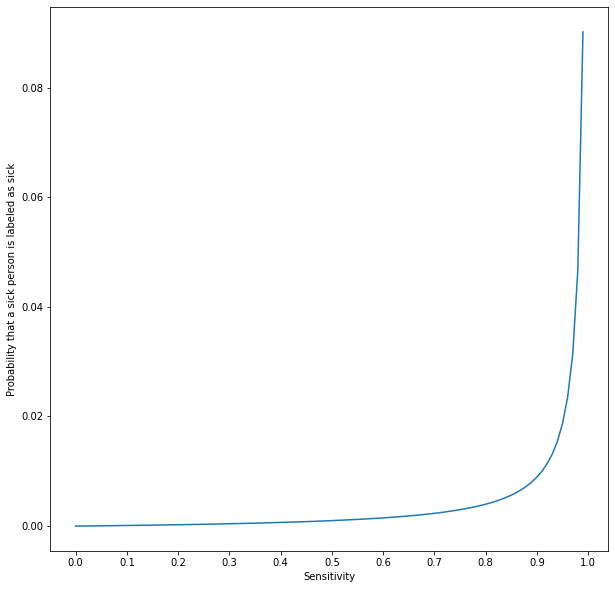

In [59]:
import matplotlib.pyplot as plt

x = np.arange(0, 1, 0.01)

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(x, bayes(0.001, x))
plt.xticks(np.arange(0,1.1, 0.1))
plt.xlabel('Sensitivity')
plt.ylabel('Probability that a sick person is labeled as sick')
plt.show()

### Zadanie 3

Sprawdź (symulacją) jak często trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze z 13 kart. Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w jakimś kolorze dostaniemy $\ge 8$ kart. Przeprowadź 1000 takich prob i oblicz średnią. Dodatkowo wypisz jedną (np. ostatnią) taką wylosowaną rękę.

In [50]:
cards = []

for i in range(13):
    cards.append(0)
    cards.append(1)
    cards.append(2)
    cards.append(3)

rd.shuffle(cards)
score = 0
dict_of_colors = {}

for i in range(10000):
    dict_of_colors[0] = 0
    dict_of_colors[1] = 0
    dict_of_colors[2] = 0
    dict_of_colors[3] = 0
    hand = np.random.choice(cards, size=13, replace=False)

    for i in hand:
        dict_of_colors[i] += 1
    for i in list(dict_of_colors.values()):
        if i >= 8:
            score += 1
            break

print(f'The last hand is {hand}')
print(f'The measured probability of getting >= 8 same color cards from 13 picked cards is {score/10000}%')

The last hand is [3 2 3 2 1 0 0 1 0 0 1 3 2]
The measured probability of getting >= 8 same color cards from 13 picked cards is 0.0043%
